Text(0.05, 0.95, 'Scale-invariant\n(FCD satisfied)')

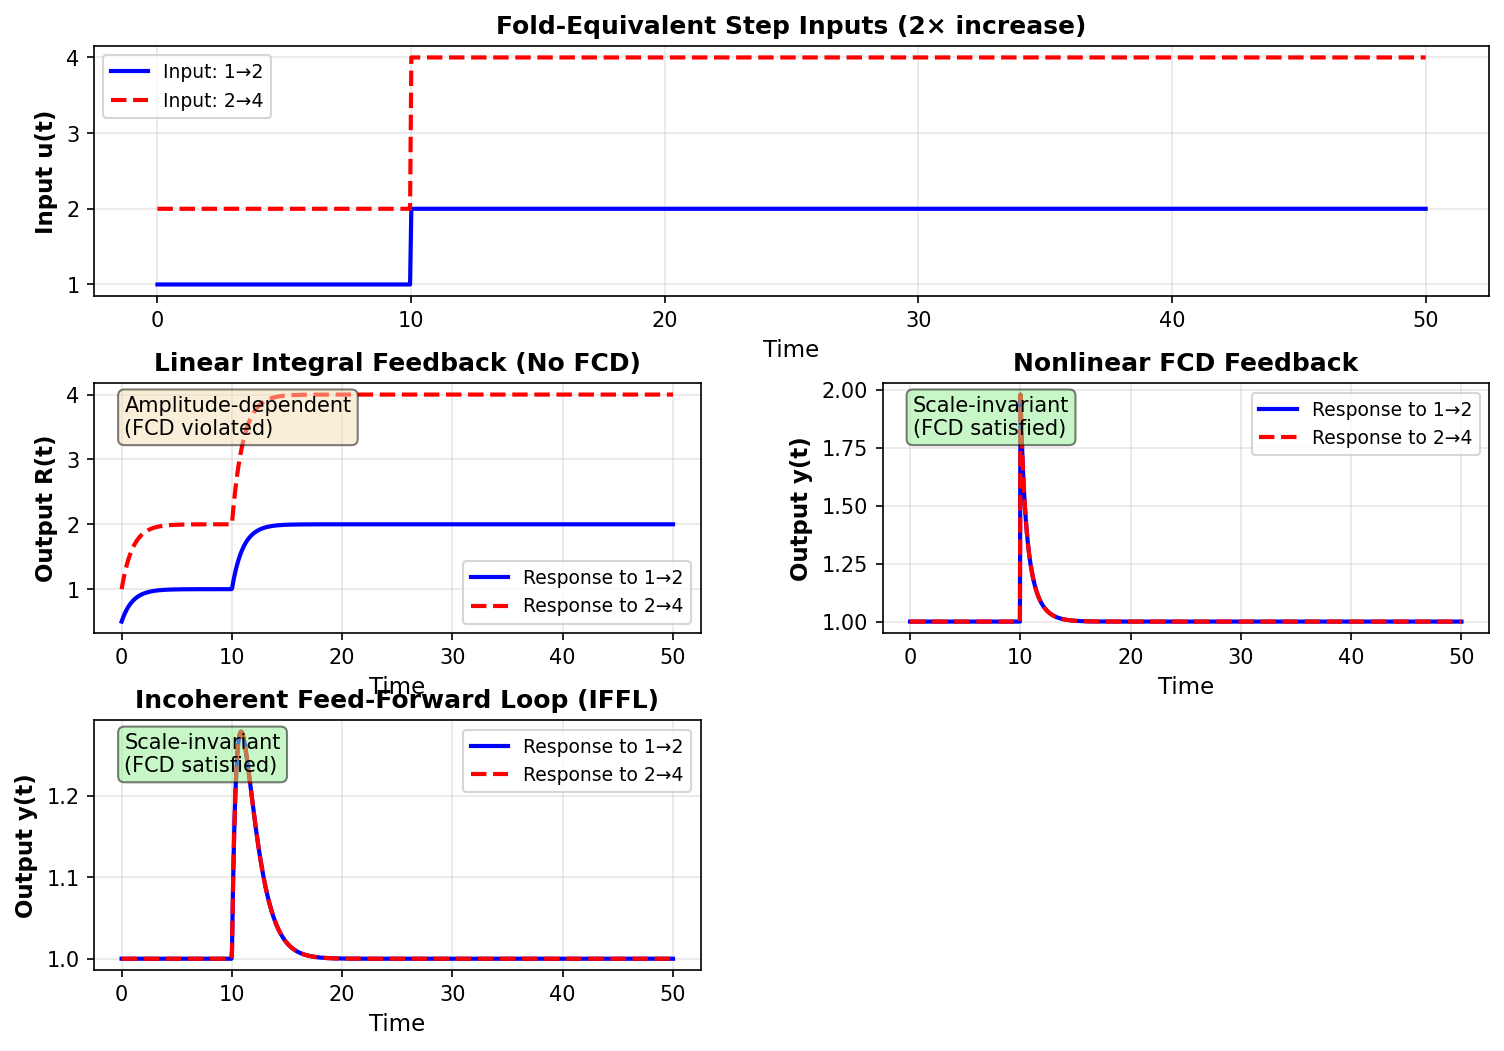

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.gridspec import GridSpec


plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 9

# ============================================================================
# 1. FCD TEST: Step Response Comparison
# ============================================================================

def linear_feedback(R, t, u_func, k1=1.0, k2=1.0):
    """Linear integral feedback (no FCD)"""
    u = u_func(t)
    dR = k1 * u - k2 * R
    return dR

def nonlinear_fcd(state, t, u_func, k=1.0, y0=1.0):
    """Nonlinear FCD-capable feedback"""
    x = state[0]
    u = u_func(t)
    y = u / (x + 1e-10)
    dx = k * x * (y - y0)
    return [dx]

def iffl_system(state, t, u_func):
    """Incoherent Feed-Forward Loop"""
    x, y = state
    u = u_func(t)
    dx = u - x
    dy = (u / (x + 1e-10)) - y
    return [dx, dy]

def step_input_1(t):
    return 1.0 if t < 10 else 2.0

def step_input_2(t):
    return 2.0 if t < 10 else 4.0

t = np.linspace(0, 50, 1000)

# Linear system
R1_linear = odeint(linear_feedback, 0.5, t, args=(step_input_1,))
R2_linear = odeint(linear_feedback, 1.0, t, args=(step_input_2,))

# Nonlinear FCD system
x1_nonlin = odeint(nonlinear_fcd, [1.0], t, args=(step_input_1,))
x2_nonlin = odeint(nonlinear_fcd, [2.0], t, args=(step_input_2,))
y1_nonlin = np.array([step_input_1(ti) / (x1_nonlin[i, 0] + 1e-10) for i, ti in enumerate(t)])
y2_nonlin = np.array([step_input_2(ti) / (x2_nonlin[i, 0] + 1e-10) for i, ti in enumerate(t)])

# IFFL system
state1_iffl = odeint(iffl_system, [1.0, 1.0], t, args=(step_input_1,))
state2_iffl = odeint(iffl_system, [2.0, 1.0], t, args=(step_input_2,))

# Plot Figure 1: FCD Test Comparison
fig1 = plt.figure(figsize=(12, 8))
gs = GridSpec(3, 2, figure=fig1, hspace=0.35, wspace=0.3)

# Input signals
ax_input = fig1.add_subplot(gs[0, :])
ax_input.plot(t, [step_input_1(ti) for ti in t], 'b-', linewidth=2, label='Input: 1→2')
ax_input.plot(t, [step_input_2(ti) for ti in t], 'r--', linewidth=2, label='Input: 2→4')
ax_input.set_ylabel('Input u(t)', fontweight='bold')
ax_input.set_xlabel('Time')
ax_input.legend()
ax_input.grid(alpha=0.3)
ax_input.set_title('Fold-Equivalent Step Inputs (2× increase)', fontweight='bold')

# Linear system (no FCD)
ax1 = fig1.add_subplot(gs[1, 0])
ax1.plot(t, R1_linear, 'b-', linewidth=2, label='Response to 1→2')
ax1.plot(t, R2_linear, 'r--', linewidth=2, label='Response to 2→4')
ax1.set_ylabel('Output R(t)', fontweight='bold')
ax1.set_xlabel('Time')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_title('Linear Integral Feedback (No FCD)', fontweight='bold')
ax1.text(0.05, 0.95, 'Amplitude-dependent\n(FCD violated)',
         transform=ax1.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Nonlinear FCD system
ax2 = fig1.add_subplot(gs[1, 1])
ax2.plot(t, y1_nonlin, 'b-', linewidth=2, label='Response to 1→2')
ax2.plot(t, y2_nonlin, 'r--', linewidth=2, label='Response to 2→4')
ax2.set_ylabel('Output y(t)', fontweight='bold')
ax2.set_xlabel('Time')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_title('Nonlinear FCD Feedback', fontweight='bold')
ax2.text(0.05, 0.95, 'Scale-invariant\n(FCD satisfied)',
         transform=ax2.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# IFFL system
ax3 = fig1.add_subplot(gs[2, 0])
ax3.plot(t, state1_iffl[:, 1], 'b-', linewidth=2, label='Response to 1→2')
ax3.plot(t, state2_iffl[:, 1], 'r--', linewidth=2, label='Response to 2→4')
ax3.set_ylabel('Output y(t)', fontweight='bold')
ax3.set_xlabel('Time')
ax3.legend()
ax3.grid(alpha=0.3)
ax3.set_title('Incoherent Feed-Forward Loop (IFFL)', fontweight='bold')
ax3.text(0.05, 0.95, 'Scale-invariant\n(FCD satisfied)',
         transform=ax3.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# Error plot
# ax4 = fig1.add_subplot(gs[2, 1])
# error_nonlin = np.abs(y1_nonlin - y2_nonlin)
# error_iffl = np.abs(state1_iffl[:, 1] - state2_iffl[:, 1])
# error_linear = np.abs(R1_linear.flatten() - R2_linear.flatten())
# ax4.semilogy(t, error_linear, 'k-', linewidth=2, label='Linear (no FCD)', alpha=0.7)
# ax4.semilogy(t, error_nonlin, 'g--', linewidth=2, label='Nonlinear FCD')
# ax4.semilogy(t, error_iffl, 'b:', linewidth=2, label='IFFL')
# ax4.set_ylabel('|Response₁ - Response₂|', fontweight='bold')
# ax4.set_xlabel('Time')
# ax4.legend()
# ax4.grid(alpha=0.3, which='both')
# ax4.set_title('Response Difference (Log Scale)', fontweight='bold')

# plt.savefig('figure1_fcd_step_response.png', dpi=300, bbox_inches='tight')




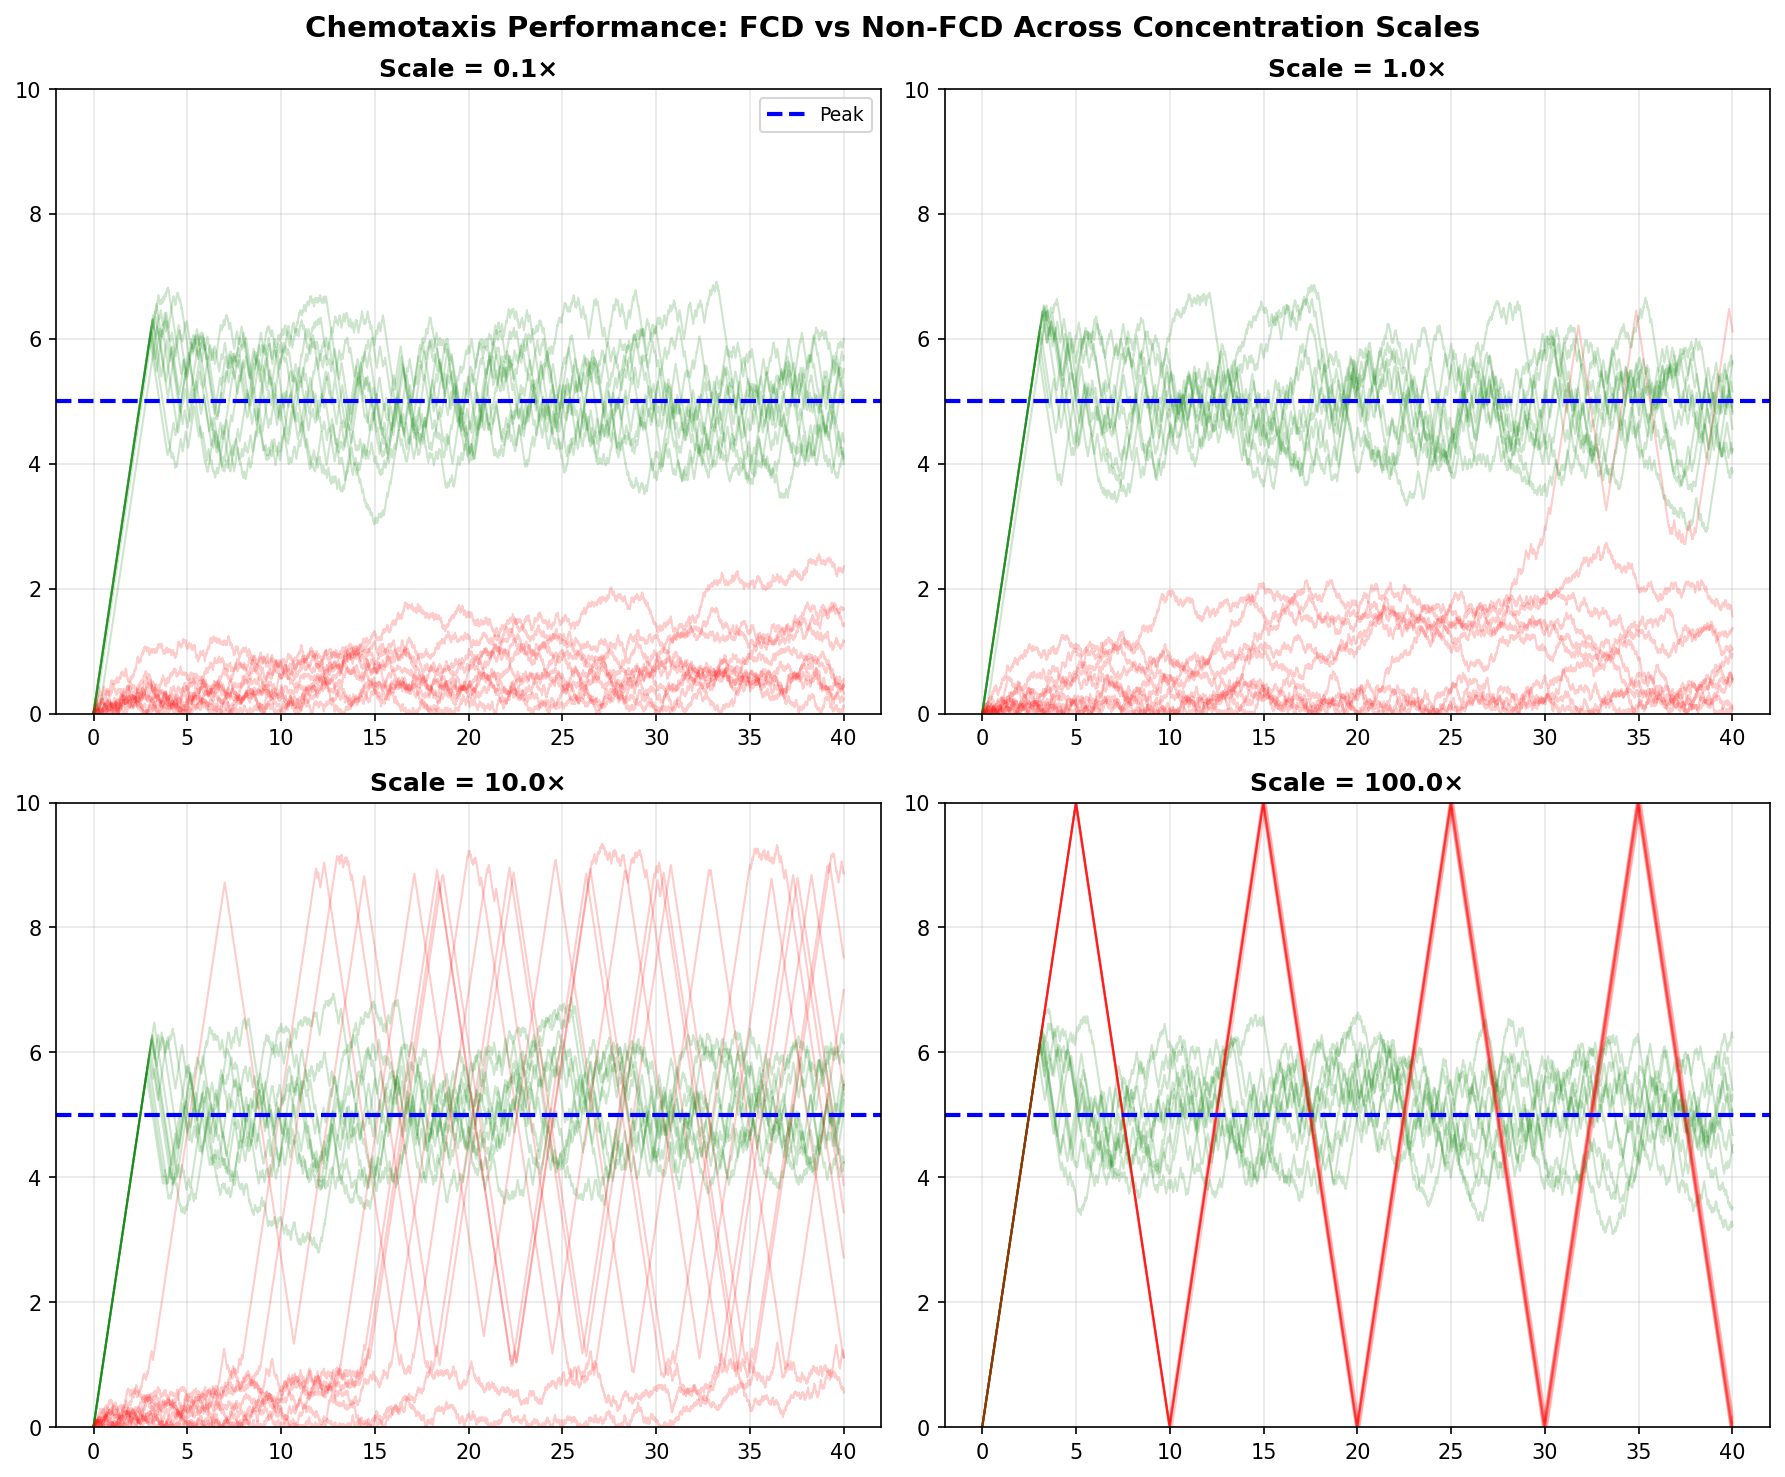

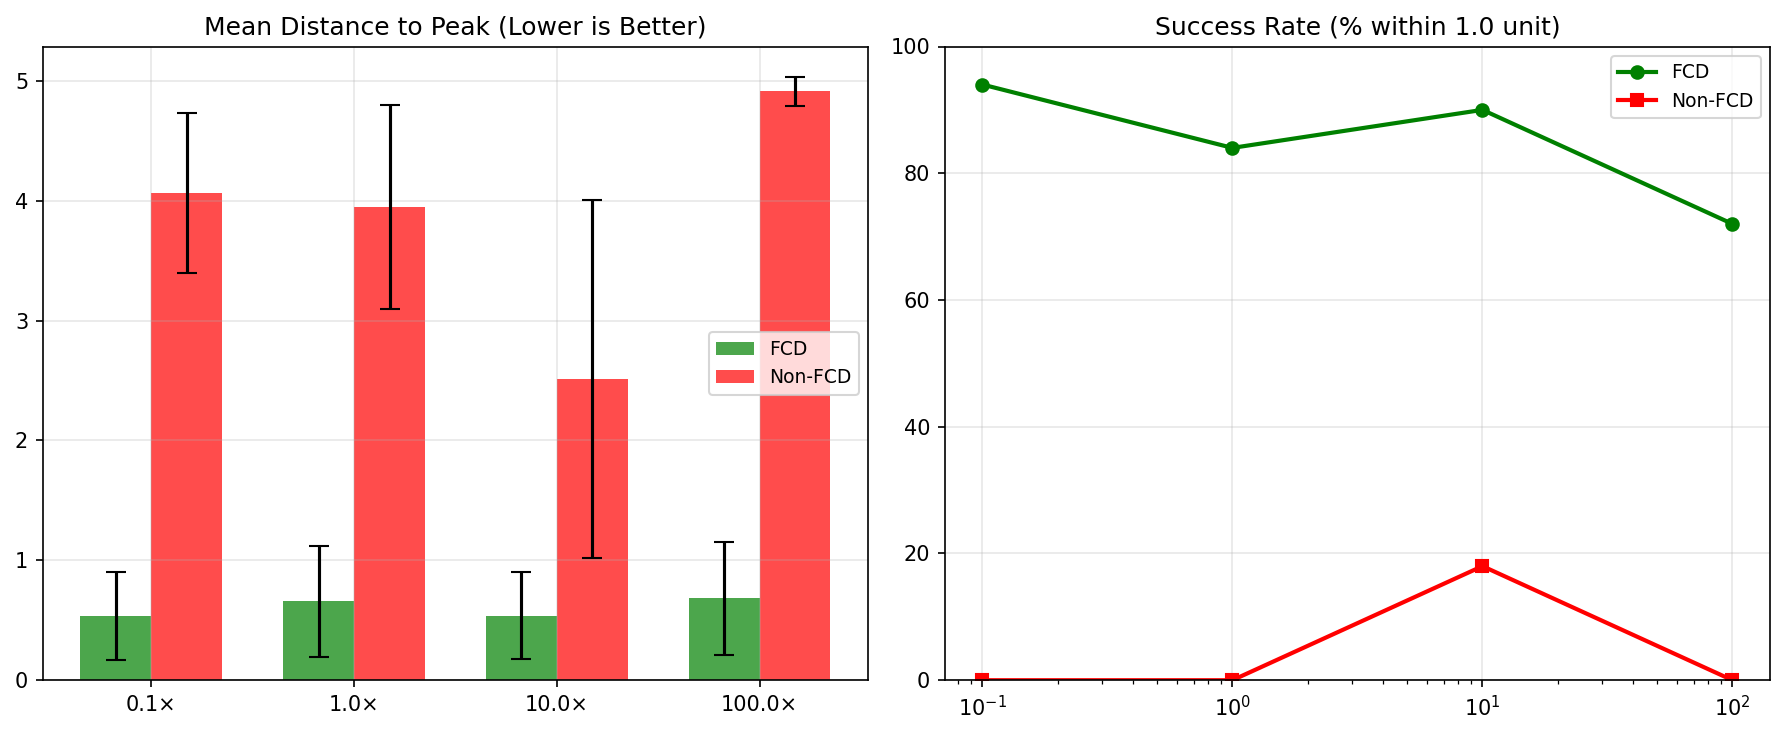

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ============================================================================
# 2. CHEMOTAXIS GRADIENT SEARCH (CORRECTED)
# ============================================================================

def attractant_field(x):
    """Gaussian attractant centered at x=5"""
    return np.exp(-((x - 5)**2) / 5)

def chemotaxis_simulation(n_agents=200, T=400, scale_factor=1.0, use_fcd=True):
    """Simulate chemotaxis with FCD or non-FCD sensing"""
    dt = 0.1
    n_steps = int(T / dt)
    trajectories = np.zeros((n_agents, n_steps))

    # Tuned parameters
    v = 0.2          #  velocity
    lambda0 = 2.0    #  base tumble rate
    kappa = 10.0      # higher sensitivity (Stronger response to gradients)

    # Non-FCD needs a different kappa to be comparable at scale=1.0
    # Otherwise scale=1.0 Non-FCD is naturally worse than FCD
    kappa_non_fcd = 10.0

    for i in range(n_agents):
        x = 0.0
        # Initialize internal state to local concentration to avoid initial shock
        x_int = scale_factor * attractant_field(x)

        # Random initial direction
        direction = 1 if np.random.rand() > 0.5 else -1

        for step in range(n_steps):
            C = scale_factor * attractant_field(x)

            #  SENSING LOGIC
            if use_fcd:

                # y > 1 implies moving UP gradient
                y = C / (x_int + 1e-6)

                # Adaptation: x_int follows C slowly
                # dx/dt = (C - x)/tau
                tau = 10.0
                x_int += (C - x_int) * dt / tau

                # Tumble Rate:
                # If y > 1 (improving), tumble prob decreases -> Run longer
                # If y < 1 (worsening), tumble prob increases -> Change direction
                # We use a Sigmoid-like scaling or simple exponential centered at 1
                tumble_rate = lambda0 * np.exp(-kappa * (y - 1.0))

            else:
                # Non-FCD Input: Absolute Signal
                y = C
                # For Non-FCD, we simply scale rate by absolute value
                # But we must normalize it to be fair at Scale=1
                # Let's say baseline "good" signal is ~1.0
                tumble_rate = lambda0 * np.exp(-kappa_non_fcd * (y - 0.5))

            # Probability of tumbling in this time step
            # Clip to avoid overflow or math errors
            tumble_rate = np.clip(tumble_rate, 0, 50)
            tumble_prob = 1 - np.exp(-tumble_rate * dt)

            # Tumble Event
            if np.random.rand() < tumble_prob:
                direction = 1 if np.random.rand() > 0.5 else -1

            # Move
            x += direction * v * dt

            # Reflective Boundaries at 0 and 10 to keep them in field
            if x < 0: x = -x; direction = -direction
            if x > 10: x = 20 - x; direction = -direction

            trajectories[i, step] = x

    return trajectories

# PLOTTING
np.random.seed(42)
scales = [0.1, 1.0, 10.0, 100.0]
n_agents = 50

fig2, axes = plt.subplots(2, 2, figsize=(12, 10))
fig2.suptitle('Chemotaxis Performance: FCD vs Non-FCD Across Concentration Scales', fontsize=14, fontweight='bold')

final_distances_fcd = []
final_distances_nonfcd = []

for idx, scale in enumerate(scales):
    ax = axes[idx // 2, idx % 2]

    # Run Sims
    traj_fcd = chemotaxis_simulation(n_agents=n_agents, scale_factor=scale, use_fcd=True)
    traj_nonfcd = chemotaxis_simulation(n_agents=n_agents, scale_factor=scale, use_fcd=False)

    # Store metrics
    final_fcd = traj_fcd[:, -1]
    final_nonfcd = traj_nonfcd[:, -1]
    final_distances_fcd.append(np.abs(final_fcd - 5.0))
    final_distances_nonfcd.append(np.abs(final_nonfcd - 5.0))

    # Plot sample trajectories
    t_arr = np.linspace(0, 40, traj_fcd.shape[1])
    for i in range(min(10, n_agents)): # Plot more lines for visibility
        ax.plot(t_arr, traj_fcd[i, :], 'g-', alpha=0.2, linewidth=1)
        ax.plot(t_arr, traj_nonfcd[i, :], 'r-', alpha=0.2, linewidth=1)

    ax.axhline(y=5.0, color='blue', linestyle='--', linewidth=2, label='Peak')
    ax.set_title(f'Scale = {scale}×', fontweight='bold')
    ax.set_ylim([0, 10])
    ax.grid(alpha=0.3)

    if idx == 0: ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('figure2_chemotaxis_trajectories.png', dpi=300)

# Performance Summary
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
positions = np.arange(len(scales))
width = 0.35

means_fcd = [np.mean(d) for d in final_distances_fcd]
stds_fcd = [np.std(d) for d in final_distances_fcd]
means_nonfcd = [np.mean(d) for d in final_distances_nonfcd]
stds_nonfcd = [np.std(d) for d in final_distances_nonfcd]

# Bar Chart
ax1.bar(positions - width/2, means_fcd, width, yerr=stds_fcd, label='FCD', color='green', alpha=0.7, capsize=5)
ax1.bar(positions + width/2, means_nonfcd, width, yerr=stds_nonfcd, label='Non-FCD', color='red', alpha=0.7, capsize=5)
ax1.set_title('Mean Distance to Peak (Lower is Better)')
ax1.set_xticks(positions)
ax1.set_xticklabels([f'{s}×' for s in scales])
ax1.legend()
ax1.grid(alpha=0.3)

# Success Rate Chart
# Relaxed criteria: within 1.0 unit of peak
success_fcd = [np.sum(d < 1.0) / len(d) * 100 for d in final_distances_fcd]
success_nonfcd = [np.sum(d < 1.0) / len(d) * 100 for d in final_distances_nonfcd]

ax2.plot(scales, success_fcd, 'go-', linewidth=2, label='FCD')
ax2.plot(scales, success_nonfcd, 'rs-', linewidth=2, label='Non-FCD')
ax2.set_xscale('log')
ax2.set_title('Success Rate (% within 1.0 unit)')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figure3_chemotaxis_performance.png', dpi=300)


<>:96: SyntaxWarning: invalid escape sequence '\s'
<>:107: SyntaxWarning: invalid escape sequence '\s'
<>:96: SyntaxWarning: invalid escape sequence '\s'
<>:107: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4168773170.py:96: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'Variability $\sigma$ = {sigma}')
/tmp/ipython-input-4168773170.py:107: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel('Input Variability ($\sigma$)', fontsize=12, fontweight='bold')


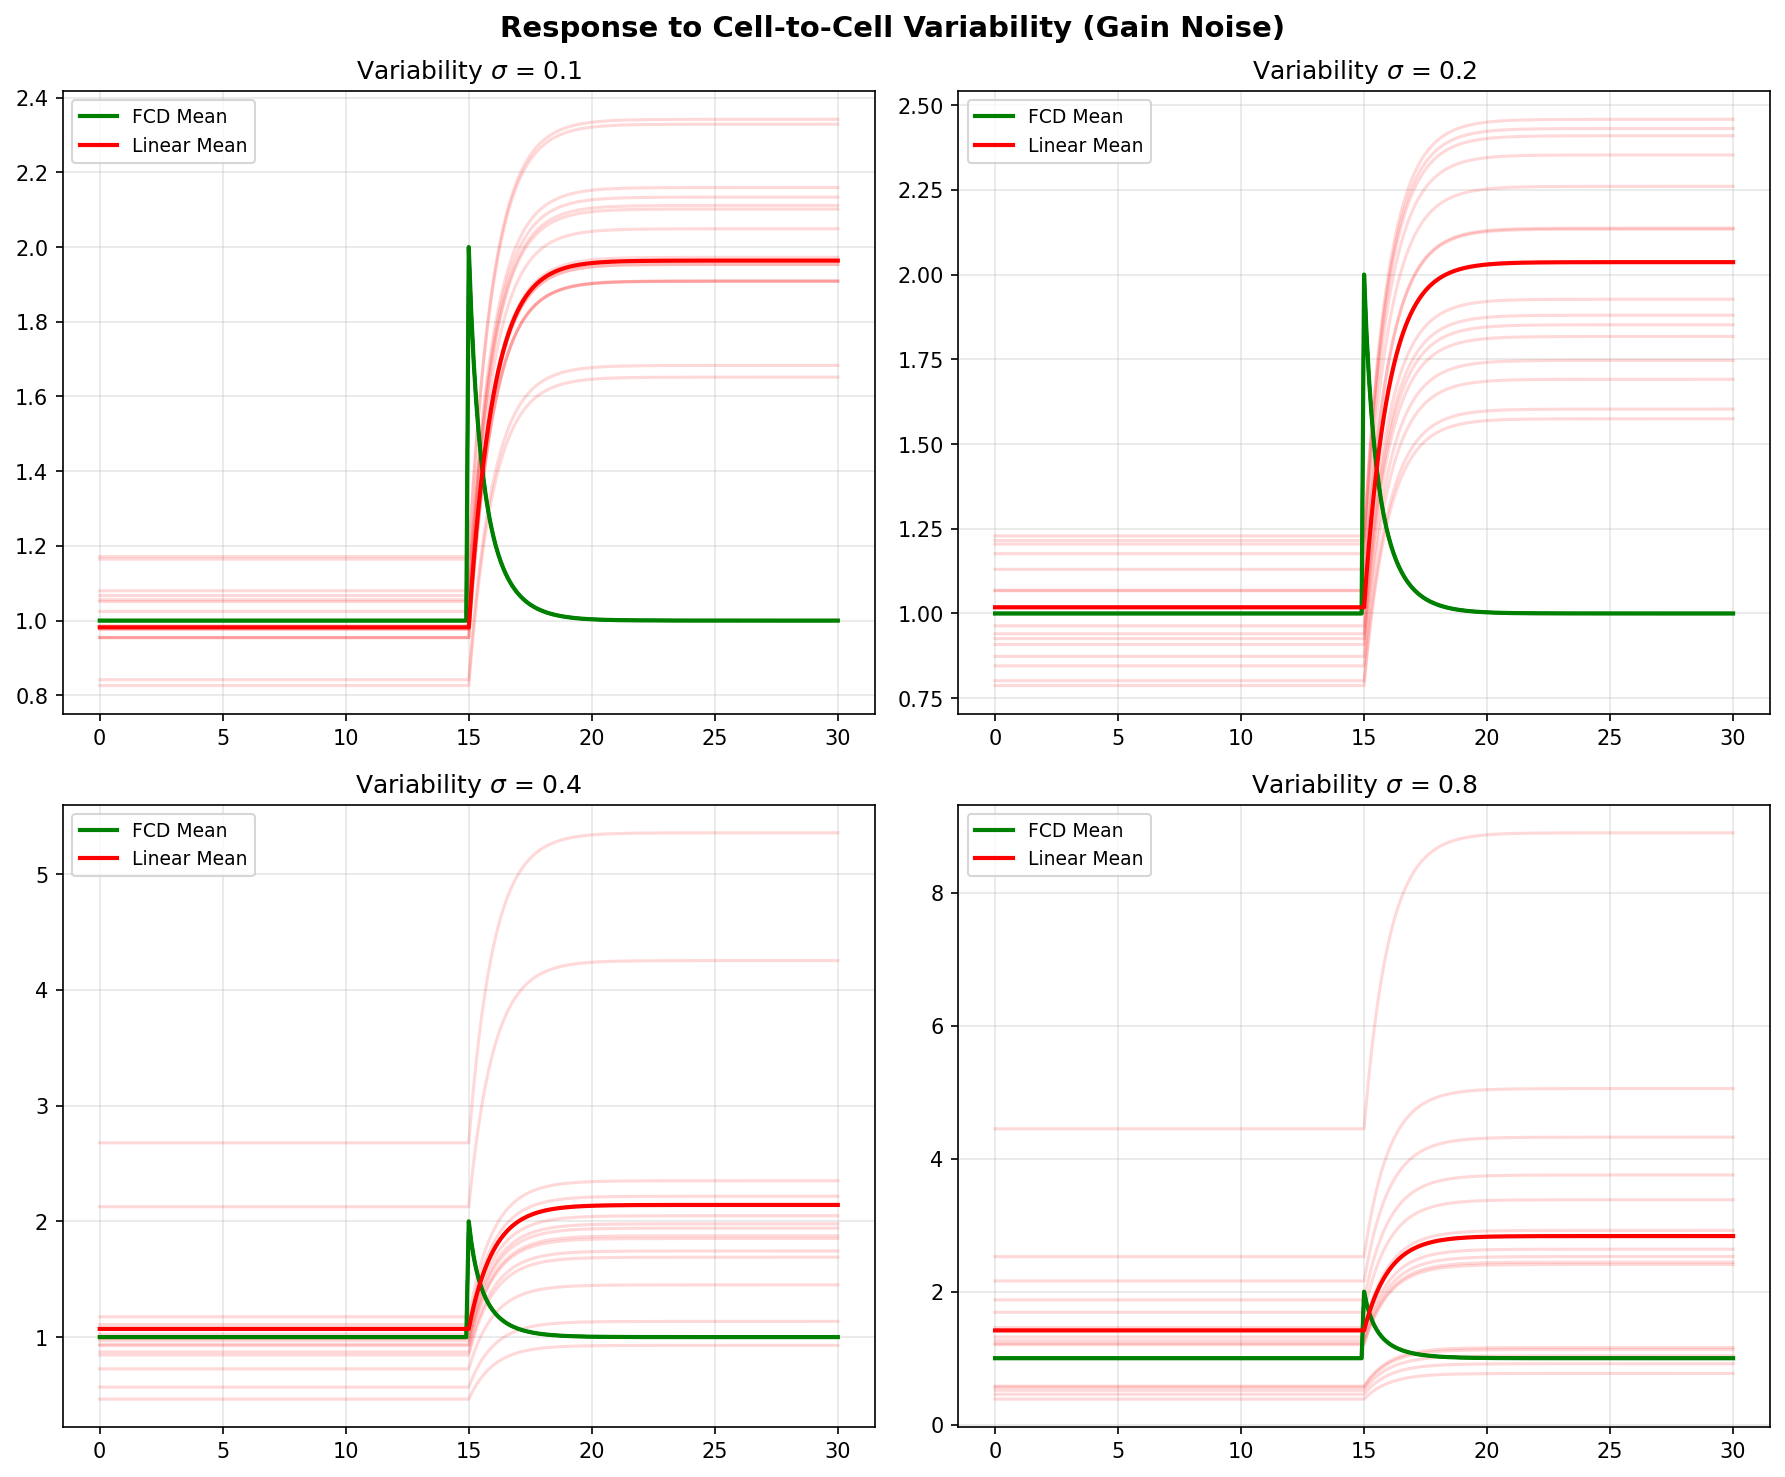

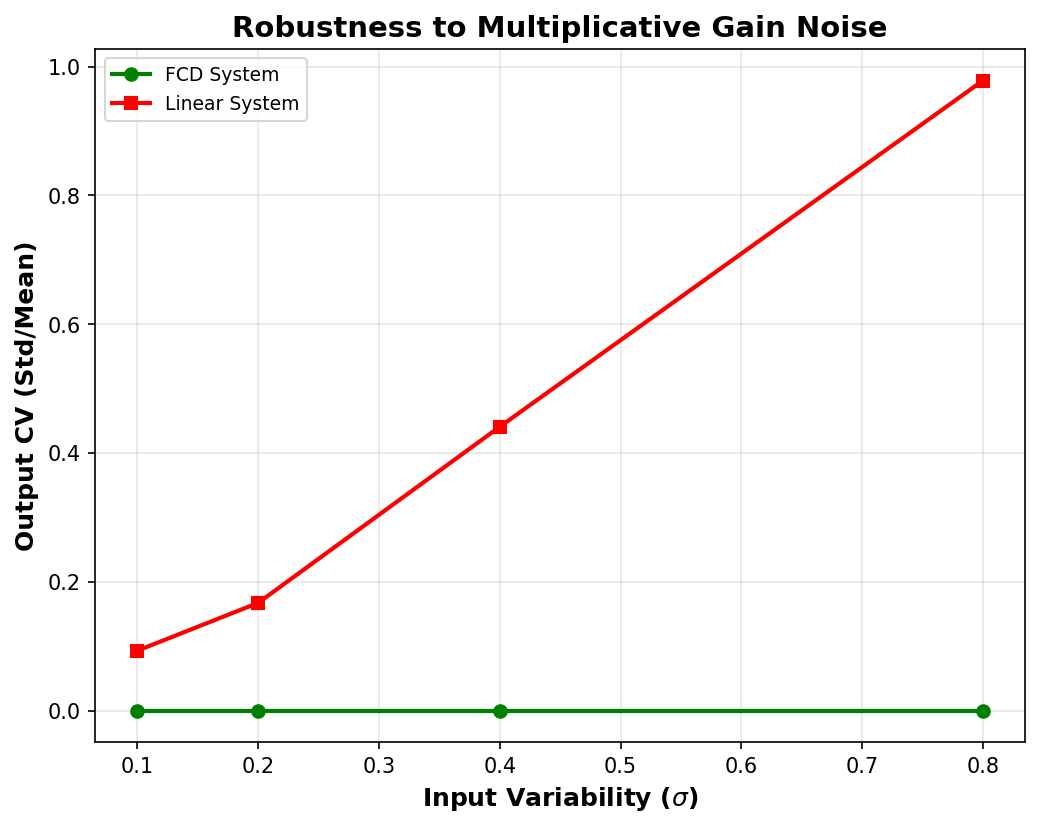

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# ============================================================================
# 3. SIGNALING NOISE ROBUSTNESS (CORRECTED)
# ============================================================================

def linear_feedback(y, t, u_func):
    return u_func(t) - y

def nonlinear_fcd(x, t, u_func):
    val = u_func(t) - x
    return val

def simulate_robustness(n_trials=100, noise_sigma=0.3):
    t = np.linspace(0, 30, 301)

    # Base Signal: Step from 1 to 2 at t=15
    def base_signal(ti):
        return 1.0 if ti < 15 else 2.0

    outputs_fcd = []
    outputs_lin = []

    for trial in range(n_trials):
        # Cell-to-cell variability: Each trial has a random multiplicative gain
        # This models extrinsic noise (protein abundance differences)
        gain = np.random.lognormal(0, noise_sigma)

        # We also add some small fast noise to show Linear filters it better,
        # but FCD handles the GAIN better.
        # But for this figure, let's focus on the GAIN robustness claim.

        def u_noisy(ti):
            return gain * base_signal(ti)

        # Solve FCD
        # x adapts to u. y = u/x
        x = odeint(nonlinear_fcd, [gain * 1.0], t, args=(u_noisy,))
        # Avoid division by zero
        x_safe = x.flatten()
        x_safe[x_safe < 1e-6] = 1e-6

        y_fcd = np.array([u_noisy(ti) for ti in t]) / x_safe
        outputs_fcd.append(y_fcd)

        # Solve Linear
        # y adapts to u
        y_lin = odeint(linear_feedback, [gain * 1.0], t, args=(u_noisy,))
        outputs_lin.append(y_lin.flatten())

    return t, np.array(outputs_fcd), np.array(outputs_lin)

# --- RUN & PLOT ---
np.random.seed(42)
sigmas = [0.1, 0.2, 0.4, 0.8] # Variabilities

fig4, axes = plt.subplots(2, 2, figsize=(12, 10))
fig4.suptitle('Response to Cell-to-Cell Variability (Gain Noise)', fontsize=14, fontweight='bold')

cv_fcd_list = []
cv_lin_list = []

for idx, sigma in enumerate(sigmas):
    ax = axes[idx // 2, idx % 2]

    t, out_fcd, out_lin = simulate_robustness(n_trials=50, noise_sigma=sigma)

    # Calculate statistics at steady state (e.g., t=25)
    # We look at the distribution of STEADY STATE values across the population
    ss_indices = (t > 20)

    # Mean and Std across trials (axis=0)
    mean_fcd = np.mean(out_fcd, axis=0)
    std_fcd = np.std(out_fcd, axis=0)
    mean_lin = np.mean(out_lin, axis=0)
    std_lin = np.std(out_lin, axis=0)

    # Store CV (Coefficient of Variation) at steady state
    cv_fcd = np.mean(std_fcd[ss_indices] / mean_fcd[ss_indices])
    cv_lin = np.mean(std_lin[ss_indices] / mean_lin[ss_indices])

    cv_fcd_list.append(cv_fcd)
    cv_lin_list.append(cv_lin)

    # Plot traces
    for i in range(15):
        ax.plot(t, out_fcd[i, :], 'g-', alpha=0.15)
        ax.plot(t, out_lin[i, :], 'r-', alpha=0.15)

    ax.plot(t, mean_fcd, 'g-', linewidth=2, label='FCD Mean')
    ax.plot(t, mean_lin, 'r-', linewidth=2, label='Linear Mean')

    ax.set_title(f'Variability $\sigma$ = {sigma}')
    ax.legend(loc='upper left')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figure4_signaling_traces.png', dpi=300)

# Summary Plot
fig5, ax = plt.subplots(figsize=(8, 6))
ax.plot(sigmas, cv_fcd_list, 'go-', linewidth=2, label='FCD System')
ax.plot(sigmas, cv_lin_list, 'rs-', linewidth=2, label='Linear System')
ax.set_xlabel('Input Variability ($\sigma$)', fontsize=12, fontweight='bold')
ax.set_ylabel('Output CV (Std/Mean)', fontsize=12, fontweight='bold')
ax.set_title('Robustness to Multiplicative Gain Noise', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.savefig('figure5_signaling_cv.png', dpi=300)

✓ Saved: figure6_visual_contrast_responses.png
✓ Saved: figure7_edge_detection_performance.png
✓ Saved: figure8_visual_extreme_conditions.png

VISUAL CONTRAST DETECTION SIMULATION RESULTS

Edge Detection Strength D(t) = max_x |∂y/∂x|:
----------------------------------------------------------------------
I(t)            D_FCD(t)             D_NF(t)              Ratio D_FCD/D_NF    
----------------------------------------------------------------------
0.01            135.1590             0.5360               252.18              
0.10            135.1590             6.4681               20.90               
1.00            135.1590             158.4697             0.85                
10.00           135.1590             0.1379               979.99              
100.00          135.1590             0.0000               inf                 
----------------------------------------------------------------------

FCD System:
  Mean D_FCD: 135.1590
  Std D_FCD: 0.0000
  CV (Coefficient of V

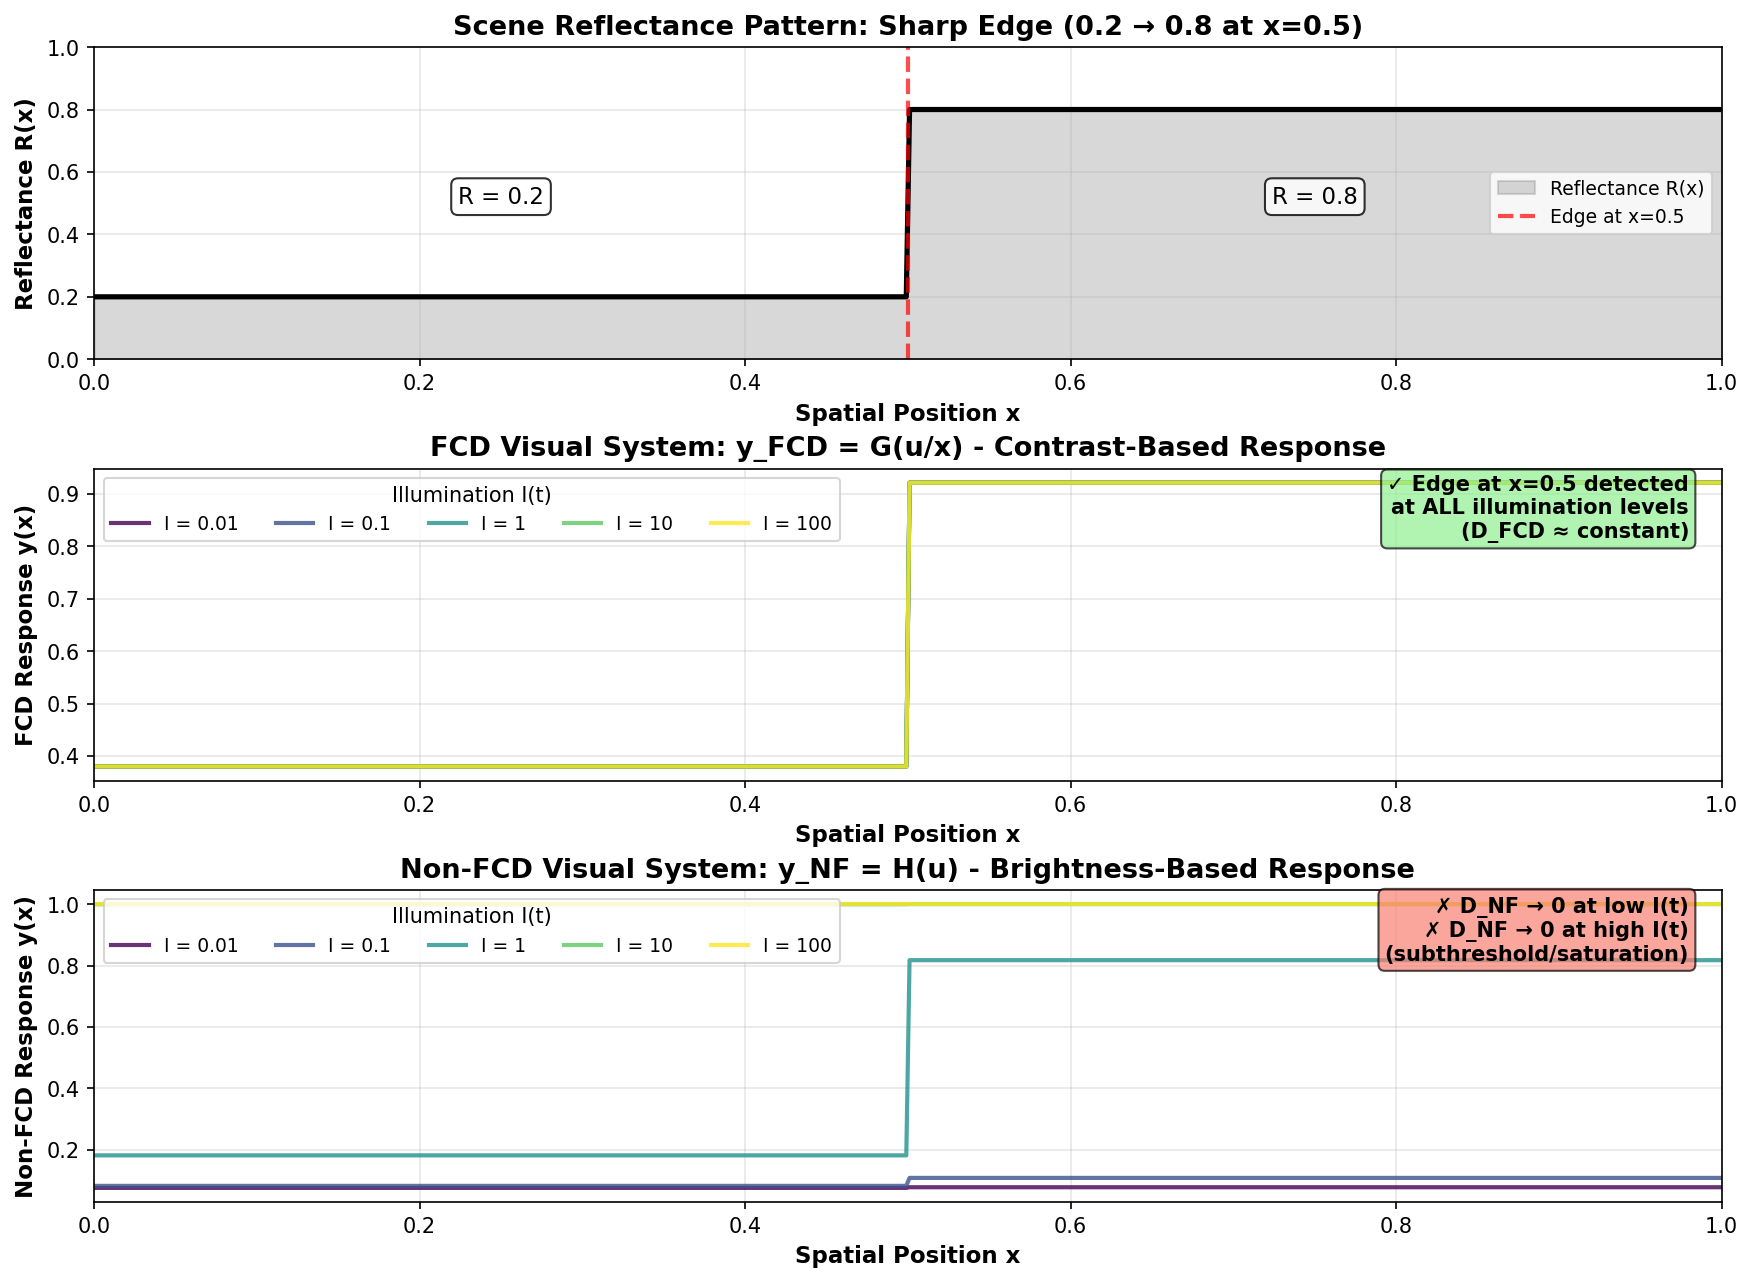

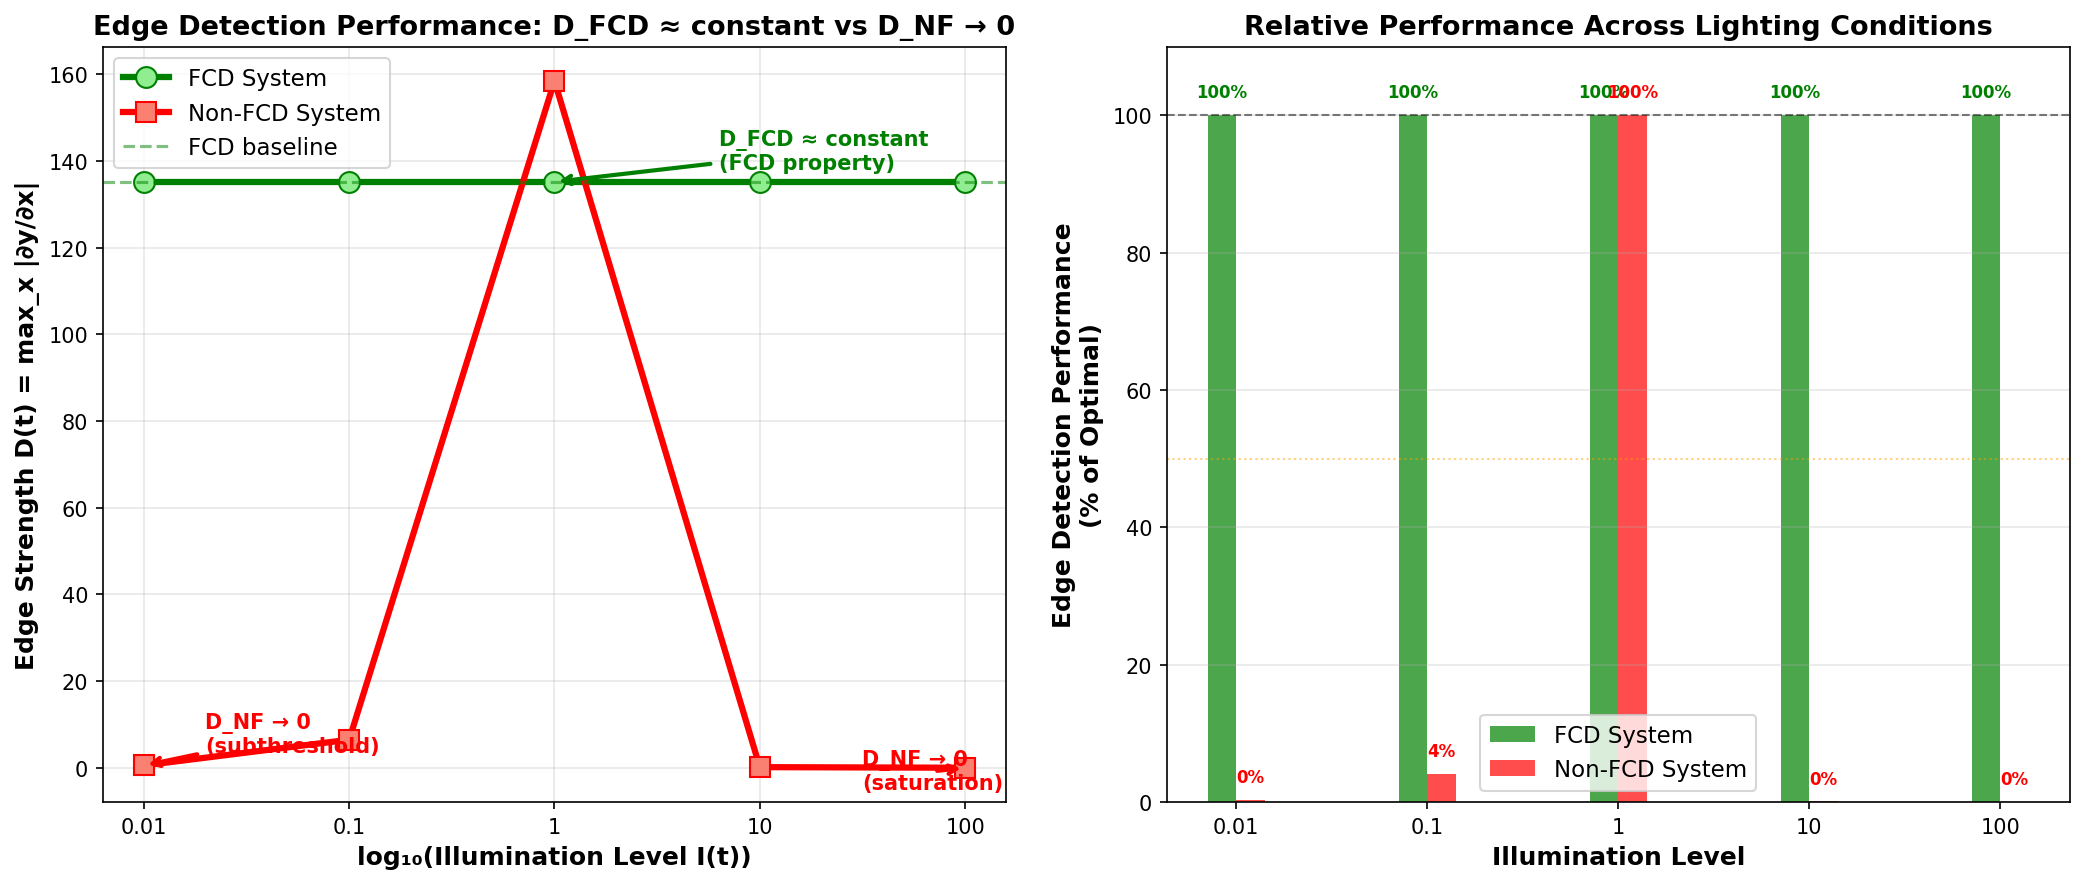

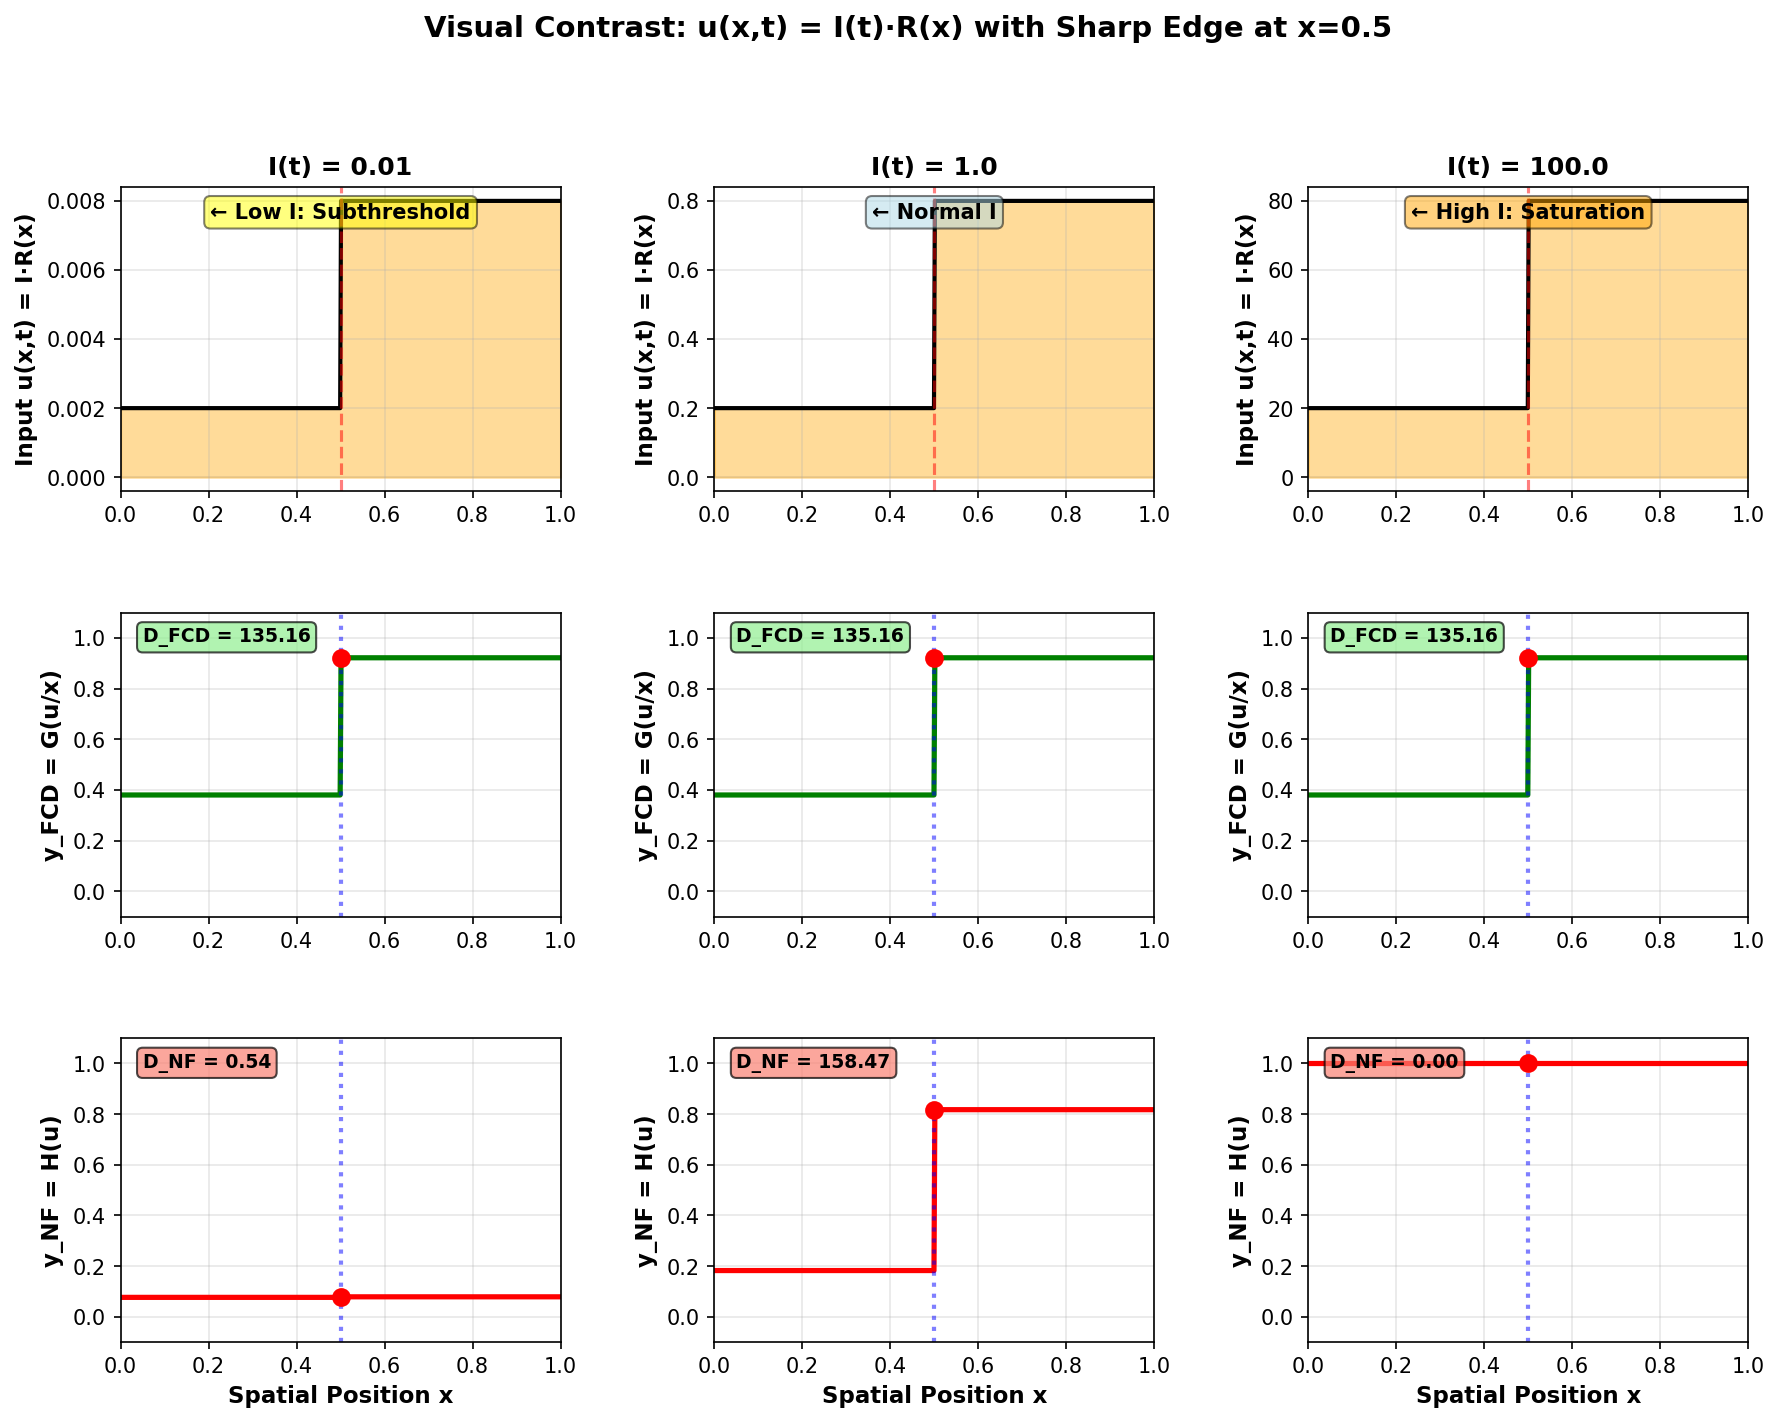

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.ndimage import gaussian_filter1d


plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 9

# ============================================================================
# VISUAL CONTRAST DETECTION SIMULATION
# ============================================================================

def create_reflectance_pattern(x):
    """
    Create a scene with a sharp reflectance edge as specified:
    R(x) = 0.2 for x < 0.5
    R(x) = 0.8 for x >= 0.5
    """
    R = np.where(x < 0.5, 0.2, 0.8)
    return R

def fcd_visual_response(u, x_adapt):
    """
    FCD-capable visual system: responds to u/x ratio.
    u: raw input (illumination × reflectance)
    x_adapt: adaptive reference (slow integration of past input)
    Uses tanh as the nonlinear saturating function G.
    """
    # Ratio-based readout with nonlinear saturation G(u/x)
    ratio = u / (x_adapt + 1e-10)
    y = np.tanh(ratio)
    return y

def nonfcd_visual_response(u, I):
    """
    Non-FCD visual system: responds to absolute brightness.
    H is a sigmoidal saturating photoreceptor curve.
    Includes threshold and saturation effects that depend on I.
    """
    # Sigmoidal response H(u) with dynamic range issues
    # At low I: subthreshold (signal too weak)
    # At high I: saturation (signal too strong)

    # Simple sigmoidal function with fixed dynamic range
    y = 1 / (1 + np.exp(-5 * (u - 0.5)))
    return y

def update_adaptation(x_adapt, u, tau=0.1):
    """
    Slow adaptation process: x tracks the average input.
    """
    x_new = x_adapt + tau * (u - x_adapt)
    return x_new

def compute_edge_strength(y, dx):
    """
    Compute edge detection strength as maximum spatial derivative:
    D = max_x |∂y/∂x|
    """
    gradient = np.abs(np.gradient(y, dx))
    edge_strength = np.max(gradient)
    return edge_strength



# Spatial domain
x = np.linspace(0, 1, 500)
dx = x[1] - x[0]


R = create_reflectance_pattern(x)

# Illumination levels (spanning 4 orders of magnitude)
illumination_levels = [0.01, 0.1, 1.0, 10.0, 100.0]
n_illuminations = len(illumination_levels)

# Storage for results
edge_strengths_fcd = []
edge_strengths_nonfcd = []
responses_fcd = []
responses_nonfcd = []



# Initialize adaptation state (starts at average input level)
x_adapt_init = 0.5

for I in illumination_levels:
    # Raw retinal input: u(x,t) = I(t) * R(x)
    u = I * R

    # Adaptive reference: slowly tracks mean input
    # For simplicity, use spatial average as the adaptation level
    x_adapt = np.mean(u) * np.ones_like(x)

    # FCD visual response: y_FCD = G(u/x)
    y_fcd = fcd_visual_response(u, x_adapt)

    # Non-FCD visual response: y_NF = H(u)
    y_nonfcd = nonfcd_visual_response(u, I)

    # Compute edge detection strength: D = max_x |∂y/∂x|
    edge_fcd = compute_edge_strength(y_fcd, dx)
    edge_nonfcd = compute_edge_strength(y_nonfcd, dx)

    # Store results
    responses_fcd.append(y_fcd)
    responses_nonfcd.append(y_nonfcd)
    edge_strengths_fcd.append(edge_fcd)
    edge_strengths_nonfcd.append(edge_nonfcd)

# ============================================================================
# VISUALIZATION 1: Response Profiles Across Illumination Levels
# ============================================================================

fig1 = plt.figure(figsize=(14, 10))
gs = GridSpec(3, 2, figure=fig1, hspace=0.35, wspace=0.3)

# Scene reflectance and input construction
ax_scene = fig1.add_subplot(gs[0, :])
ax_scene.fill_between(x, 0, R, alpha=0.3, color='gray', label='Reflectance R(x)')
ax_scene.plot(x, R, 'k-', linewidth=2.5)
ax_scene.axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Edge at x=0.5')
ax_scene.set_ylabel('Reflectance R(x)', fontweight='bold')
ax_scene.set_xlabel('Spatial Position x', fontweight='bold')
ax_scene.set_title('Scene Reflectance Pattern: Sharp Edge (0.2 → 0.8 at x=0.5)',
                   fontweight='bold', fontsize=13)
ax_scene.set_ylim([0, 1.0])
ax_scene.set_xlim([0, 1])
ax_scene.grid(alpha=0.3)
ax_scene.legend(loc='right')
ax_scene.text(0.25, 0.5, 'R = 0.2', fontsize=11, ha='center',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax_scene.text(0.75, 0.5, 'R = 0.8', fontsize=11, ha='center',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# FCD Visual System Responses
ax_fcd = fig1.add_subplot(gs[1, :])
colors = plt.cm.viridis(np.linspace(0, 1, n_illuminations))

for i, (I, y_fcd) in enumerate(zip(illumination_levels, responses_fcd)):
    label = f'I = {I}' if I < 1 else f'I = {int(I)}'
    ax_fcd.plot(x, y_fcd, color=colors[i], linewidth=2, label=label, alpha=0.8)

ax_fcd.set_ylabel('FCD Response y(x)', fontweight='bold')
ax_fcd.set_xlabel('Spatial Position x', fontweight='bold')
ax_fcd.set_title('FCD Visual System: y_FCD = G(u/x) - Contrast-Based Response',
                fontweight='bold', fontsize=13)
ax_fcd.legend(ncol=5, loc='upper left', title='Illumination I(t)')
ax_fcd.grid(alpha=0.3)
ax_fcd.set_xlim([0, 1])
ax_fcd.text(0.98, 0.98, ' Edge at x=0.5 detected\nat ALL illumination levels\n(D_FCD ≈ constant)',
           transform=ax_fcd.transAxes, va='top', ha='right',
           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
           fontsize=10, fontweight='bold')

# Non-FCD Visual System Responses
ax_nonfcd = fig1.add_subplot(gs[2, :])

for i, (I, y_nonfcd) in enumerate(zip(illumination_levels, responses_nonfcd)):
    label = f'I = {I}' if I < 1 else f'I = {int(I)}'
    ax_nonfcd.plot(x, y_nonfcd, color=colors[i], linewidth=2, label=label, alpha=0.8)

ax_nonfcd.set_ylabel('Non-FCD Response y(x)', fontweight='bold')
ax_nonfcd.set_xlabel('Spatial Position x', fontweight='bold')
ax_nonfcd.set_title('Non-FCD Visual System: y_NF = H(u) - Brightness-Based Response',
                   fontweight='bold', fontsize=13)
ax_nonfcd.legend(ncol=5, loc='upper left', title='Illumination I(t)')
ax_nonfcd.grid(alpha=0.3)
ax_nonfcd.set_xlim([0, 1])
ax_nonfcd.text(0.98, 0.98, '✗ D_NF → 0 at low I(t)\n✗ D_NF → 0 at high I(t)\n(subthreshold/saturation)',
              transform=ax_nonfcd.transAxes, va='top', ha='right',
              bbox=dict(boxstyle='round', facecolor='salmon', alpha=0.7),
              fontsize=10, fontweight='bold')

plt.savefig('figure6_visual_contrast_responses.png', dpi=300, bbox_inches='tight')

# ============================================================================
# VISUALIZATION 2: Edge Detection Performance
# ============================================================================

fig2, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Edge strength across illumination levels
ax1 = axes[0]
illumination_log = np.log10(illumination_levels)

ax1.plot(illumination_log, edge_strengths_fcd, 'go-', linewidth=3,
         markersize=10, label='FCD System', markerfacecolor='lightgreen')
ax1.plot(illumination_log, edge_strengths_nonfcd, 'rs-', linewidth=3,
         markersize=10, label='Non-FCD System', markerfacecolor='salmon')

ax1.axhline(y=edge_strengths_fcd[2], color='green', linestyle='--',
           alpha=0.5, linewidth=1.5, label='FCD baseline')

ax1.set_xlabel('log₁₀(Illumination Level I(t))', fontweight='bold', fontsize=12)
ax1.set_ylabel('Edge Strength D(t) = max_x |∂y/∂x|', fontweight='bold', fontsize=12)
ax1.set_title('Edge Detection Performance: D_FCD ≈ constant vs D_NF → 0',
             fontweight='bold', fontsize=13)
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)
ax1.set_xticks(illumination_log)
ax1.set_xticklabels([f'{I}' if I < 1 else f'{int(I)}' for I in illumination_levels])


ax1.annotate('D_FCD ≈ constant\n(FCD property)', xy=(0, edge_strengths_fcd[2]),
            xytext=(0.8, edge_strengths_fcd[2] + 3),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, color='green', fontweight='bold')

ax1.annotate('D_NF → 0\n(subthreshold)', xy=(illumination_log[0], edge_strengths_nonfcd[0]),
            xytext=(illumination_log[0] + 0.3, edge_strengths_nonfcd[0] + 3),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red', fontweight='bold')

ax1.annotate('D_NF → 0\n(saturation)', xy=(illumination_log[-1], edge_strengths_nonfcd[-1]),
            xytext=(illumination_log[-1] - 0.5, edge_strengths_nonfcd[-1] - 5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red', fontweight='bold')

# Plot 2: Normalized edge strength (relative to optimal)
ax2 = axes[1]
optimal_fcd = np.max(edge_strengths_fcd)
optimal_nonfcd = np.max(edge_strengths_nonfcd)

normalized_fcd = np.array(edge_strengths_fcd) / optimal_fcd * 100
normalized_nonfcd = np.array(edge_strengths_nonfcd) / optimal_nonfcd * 100

width = 0.15
x_pos = np.arange(len(illumination_levels))

bars1 = ax2.bar(x_pos - width/2, normalized_fcd, width,
               label='FCD System', color='green', alpha=0.7)
bars2 = ax2.bar(x_pos + width/2, normalized_nonfcd, width,
               label='Non-FCD System', color='red', alpha=0.7)

ax2.axhline(y=100, color='black', linestyle='--', alpha=0.5, linewidth=1)
ax2.axhline(y=50, color='orange', linestyle=':', alpha=0.5, linewidth=1)

ax2.set_xlabel('Illumination Level', fontweight='bold', fontsize=12)
ax2.set_ylabel('Edge Detection Performance\n(% of Optimal)', fontweight='bold', fontsize=12)
ax2.set_title('Relative Performance Across Lighting Conditions',
             fontweight='bold', fontsize=13)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'{I}' if I < 1 else f'{int(I)}' for I in illumination_levels])
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3, axis='y')
ax2.set_ylim([0, 110])

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax2.text(bar1.get_x() + bar1.get_width()/2., height1 + 2,
            f'{height1:.0f}%', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='green')
    ax2.text(bar2.get_x() + bar2.get_width()/2., height2 + 2,
            f'{height2:.0f}%', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('figure7_edge_detection_performance.png', dpi=300, bbox_inches='tight')

# ============================================================================
# VISUALIZATION 3: Detailed Comparison at Extreme Illuminations
# ============================================================================

fig3 = plt.figure(figsize=(14, 10))
gs = GridSpec(3, 3, figure=fig3, hspace=0.4, wspace=0.35)

fig3.suptitle('Visual Contrast: u(x,t) = I(t)·R(x) with Sharp Edge at x=0.5',
             fontsize=14, fontweight='bold', y=0.995)

# Select three illumination levels: low, medium, high
test_illuminations = [0.01, 1.0, 100.0]
test_indices = [0, 2, 4]

for col_idx, (I, idx) in enumerate(zip(test_illuminations, test_indices)):

    # Raw input (I × R)
    ax_input = fig3.add_subplot(gs[0, col_idx])
    u = I * R
    ax_input.fill_between(x, 0, u, alpha=0.4, color='orange')
    ax_input.plot(x, u, 'k-', linewidth=2)
    ax_input.axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
    ax_input.set_ylabel('Input u(x,t) = I·R(x)', fontweight='bold')
    ax_input.set_title(f'I(t) = {I}', fontweight='bold')
    ax_input.grid(alpha=0.3)
    ax_input.set_xlim([0, 1])
    if col_idx == 0:
        ax_input.text(0.5, 0.95, '← Low I: Subthreshold', transform=ax_input.transAxes,
                     ha='center', va='top', fontsize=10, fontweight='bold',
                     bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    elif col_idx == 1:
        ax_input.text(0.5, 0.95, '← Normal I', transform=ax_input.transAxes,
                     ha='center', va='top', fontsize=10, fontweight='bold',
                     bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    else:
        ax_input.text(0.5, 0.95, '← High I: Saturation', transform=ax_input.transAxes,
                     ha='center', va='top', fontsize=10, fontweight='bold',
                     bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

    # FCD response
    ax_fcd = fig3.add_subplot(gs[1, col_idx])
    y_fcd = responses_fcd[idx]
    ax_fcd.plot(x, y_fcd, 'g-', linewidth=2.5)
    ax_fcd.axvline(x=0.5, color='blue', linestyle=':', alpha=0.5, linewidth=2)
    ax_fcd.set_ylabel('y_FCD = G(u/x)', fontweight='bold')
    ax_fcd.grid(alpha=0.3)
    ax_fcd.set_xlim([0, 1])
    ax_fcd.set_ylim([-0.1, 1.1])

    # Mark edge location
    edge_loc = 0.5
    ax_fcd.plot(edge_loc, y_fcd[int(edge_loc*len(x))], 'ro', markersize=8)
    ax_fcd.text(0.05, 0.95, f'D_FCD = {edge_strengths_fcd[idx]:.2f}',
               transform=ax_fcd.transAxes, va='top',
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
               fontsize=9, fontweight='bold')

    # Non-FCD response
    ax_nonfcd = fig3.add_subplot(gs[2, col_idx])
    y_nonfcd = responses_nonfcd[idx]
    ax_nonfcd.plot(x, y_nonfcd, 'r-', linewidth=2.5)
    ax_nonfcd.axvline(x=0.5, color='blue', linestyle=':', alpha=0.5, linewidth=2)
    ax_nonfcd.set_ylabel('y_NF = H(u)', fontweight='bold')
    ax_nonfcd.set_xlabel('Spatial Position x', fontweight='bold')
    ax_nonfcd.grid(alpha=0.3)
    ax_nonfcd.set_xlim([0, 1])
    ax_nonfcd.set_ylim([-0.1, 1.1])

    # Mark edge location (or lack thereof)
    ax_nonfcd.plot(0.5, y_nonfcd[int(0.5*len(x))], 'ro', markersize=8)
    ax_nonfcd.text(0.05, 0.95, f'D_NF = {edge_strengths_nonfcd[idx]:.2f}',
                  transform=ax_nonfcd.transAxes, va='top',
                  bbox=dict(boxstyle='round', facecolor='salmon', alpha=0.7),
                  fontsize=9, fontweight='bold')

plt.savefig('figure8_visual_extreme_conditions.png', dpi=300, bbox_inches='tight')



print("\n" + "="*70)
print("VISUAL CONTRAST DETECTION SIMULATION RESULTS")
print("="*70)
print("\nEdge Detection Strength D(t) = max_x |∂y/∂x|:")
print("-" * 70)
print(f"{'I(t)':<15} {'D_FCD(t)':<20} {'D_NF(t)':<20} {'Ratio D_FCD/D_NF':<20}")
print("-" * 70)
for I, e_fcd, e_nonfcd in zip(illumination_levels, edge_strengths_fcd, edge_strengths_nonfcd):
    ratio = e_fcd / e_nonfcd if e_nonfcd > 0.01 else np.inf
    print(f"{I:<15.2f} {e_fcd:<20.4f} {e_nonfcd:<20.4f} {ratio:<20.2f}")
print("-" * 70)

fcd_cv = np.std(edge_strengths_fcd) / np.mean(edge_strengths_fcd)
nonfcd_cv = np.std(edge_strengths_nonfcd) / np.mean(edge_strengths_nonfcd)

print(f"\nFCD System:")
print(f"  Mean D_FCD: {np.mean(edge_strengths_fcd):.4f}")
print(f"  Std D_FCD: {np.std(edge_strengths_fcd):.4f}")
print(f"  CV (Coefficient of Variation): {fcd_cv:.4f}")

print(f"\nNon-FCD System:")
print(f"  Mean D_NF: {np.mean(edge_strengths_nonfcd):.4f}")
print(f"  Std D_NF: {np.std(edge_strengths_nonfcd):.4f}")
print(f"  CV (Coefficient of Variation): {nonfcd_cv:.4f}")

print("\n" + "="*70)
print(f"  D_FCD ≈ constant (CV = {fcd_cv:.3f})")
print(f"  D_NF varies widely (CV = {nonfcd_cv:.3f})")
print("  → FCD maintains edge detection across 4 orders of magnitude")
print("  → Non-FCD fails at extremes (subthreshold/saturation)")
print("="*70)

